In [2]:
from pathlib import Path

p = Path("plots.ipynb").resolve()
p = p.parent / "assets"

assert p.exists()

## docs/guide/gaussianmf.md

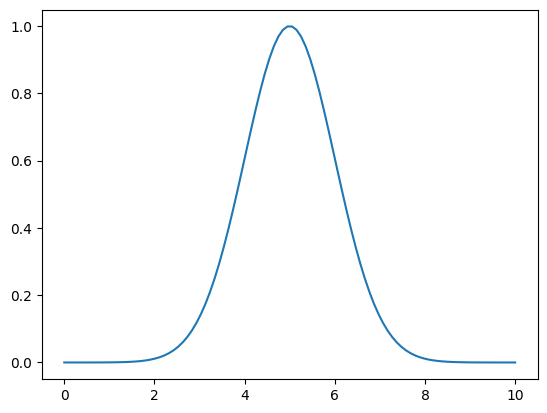

In [3]:
import numpy as np
from anfis_toolbox import GaussianMF
import matplotlib.pyplot as plt


# Generate a range of x values
x = np.linspace(0, 10, 100)

# Create a Gaussian membership function with a mean of 5 and a sigma of 2
gaussian = GaussianMF(5, 1)

# Calculate the membership values (y) for each x value
y = gaussian(x)

plt.plot(x, y)

plt.savefig(p / "gaussian_mf.svg", format="svg")

plt.show()

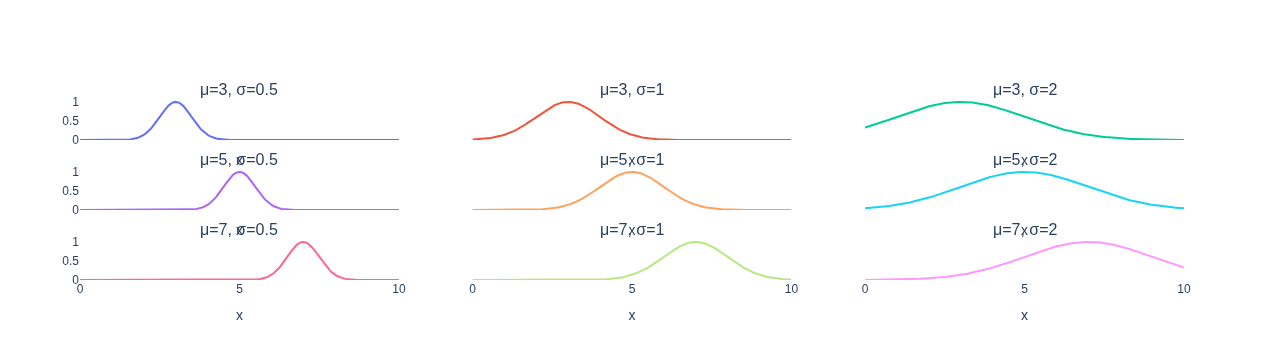

In [4]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from anfis_toolbox import GaussianMF

# Geração dos dados para o eixo x
x = np.linspace(0, 10, 200)

# Valores de média e desvio padrão para os subplots
mus = [3, 5, 7]
sigmas = [0.5, 1, 2]

# Cria um array com os títulos de cada subplot
subplot_titles = [f"μ={mu}, σ={sigma}" for mu in mus for sigma in sigmas]

# Cria a grade de subplots 3x3
fig = make_subplots(rows=len(mus), cols=len(sigmas), subplot_titles=subplot_titles)

# Adiciona um traço para cada combinação de mu e sigma
for i, mu in enumerate(mus):
    for j, sigma in enumerate(sigmas):
        # Gera os dados para a curva atual
        gaussian = GaussianMF(mu, sigma)
        y = gaussian(x)
        
        # Adiciona o traço no subplot correto (índices de linha e coluna começam em 1)
        fig.add_trace(
            go.Scatter(x=x, y=y, mode='lines', name=f'μ={mu}, σ={sigma}'),
            row=i + 1, col=j + 1
        )

# Atualiza o layout do gráfico com fundo transparente
fig.update_layout(
    showlegend=False,
    #paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Atualiza os eixos de cada subplot para ter uma escala e rótulos consistentes
for i in range(len(mus)):
    for j in range(len(sigmas)):
        # Atualiza o eixo Y
        fig.update_yaxes(
            range=[0, 1.05],
            showticklabels=(j == 0),  # Mostra rótulos apenas na primeira coluna
            row=i + 1, col=j + 1
        )
        
        # Atualiza o eixo X
        fig.update_xaxes(
            showticklabels=(i == len(mus) - 1),  # Mostra rótulos apenas na última linha
            row=i + 1, col=j + 1
        )
        
        
# Mostra o gráfico (ideal para Jupyter Notebooks)
fig.show()

pio.write_html(fig, file= p / "gaussian_mf_subplots.html")

## docs/guide/bellmf.md


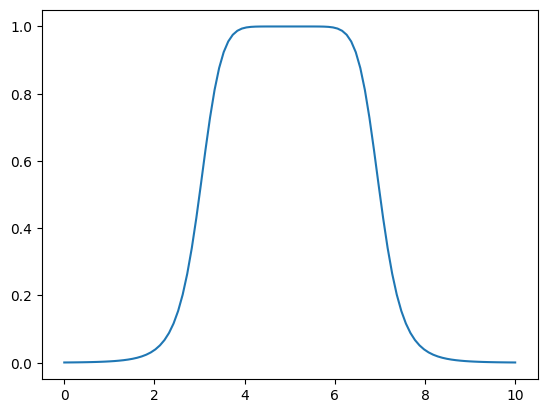

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from anfis_toolbox import BellMF


bellmf = BellMF(a=2, b=4, c=5)
x = np.linspace(0, 10, 100)
y = bellmf(x)

plt.plot(x, y)
plt.savefig(p / "bell_mf.svg", format="svg")

plt.show()

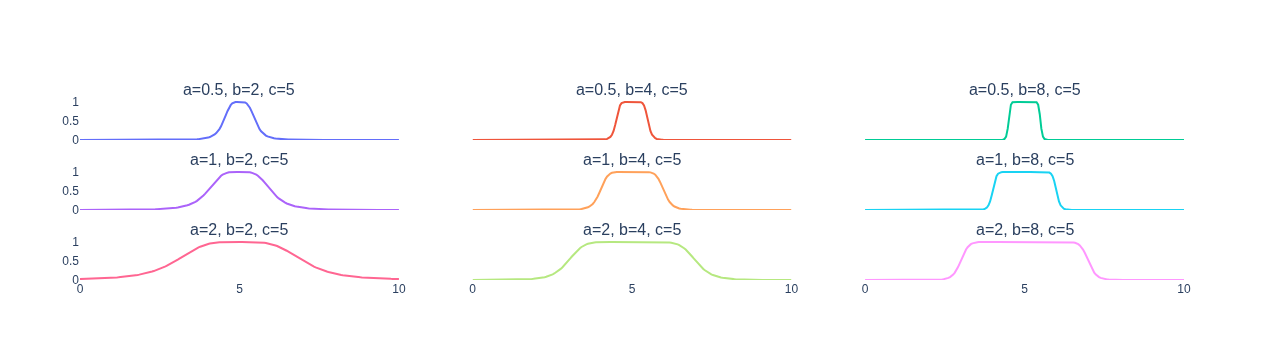

In [7]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from anfis_toolbox import BellMF

# Geração dos dados para o eixo x
x = np.linspace(0, 10, 200)

# Valores para os parâmetros a, b e c
as_params = [0.5, 1, 2]
bs_params = [2, 4, 8]
cs_params = [3, 5, 7]

# Cria um array com os títulos de cada subplot
# Combinação de a, b e c para os títulos
subplot_titles = [f"a={a}, b={b}, c={c}" for a in as_params for b in bs_params for c in cs_params]

# Cria a grade de subplots 3x3
# Observe que a grade de 3x3 para 'a', 'b' e 'c' pode ser grande. 
# Para manter a clareza, vamos plotar a variação de 'a' e 'b' fixando 'c'.
# O exemplo original usa 3x3 para 'mu' e 'sigma', então vamos adaptar.
# A melhor abordagem é variar dois parâmetros e manter um fixo.
# Vamos variar 'a' e 'b' e fixar 'c' em um valor central (e.g., c=5).

cs_fixed = 5
subplot_titles = [f"a={a}, b={b}, c={cs_fixed}" for a in as_params for b in bs_params]

fig = make_subplots(rows=len(as_params), cols=len(bs_params), subplot_titles=subplot_titles)

# Adiciona um traço para cada combinação de a e b
for i, a in enumerate(as_params):
    for j, b in enumerate(bs_params):
        # Gera os dados para a curva atual
        bell = BellMF(a, b, cs_fixed)
        y = bell(x)
        
        # Adiciona o traço no subplot correto
        fig.add_trace(
            go.Scatter(x=x, y=y, mode='lines', name=f'a={a}, b={b}, c={cs_fixed}'),
            row=i + 1, col=j + 1
        )

# Atualiza o layout do gráfico com fundo transparente
fig.update_layout(
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)'
)

# Atualiza os eixos de cada subplot para ter uma escala e rótulos consistentes
for i in range(len(as_params)):
    for j in range(len(bs_params)):
        # Atualiza o eixo Y
        fig.update_yaxes(
            range=[0, 1.05],
            showticklabels=(j == 0),  # Mostra rótulos apenas na primeira coluna
            row=i + 1, col=j + 1
        )
        
        # Atualiza o eixo X
        fig.update_xaxes(
            showticklabels=(i == len(as_params) - 1),  # Mostra rótulos apenas na última linha
            row=i + 1, col=j + 1
        )
        
# Mostra o gráfico (ideal para Jupyter Notebooks)
fig.show()

# Para salvar o plot em um arquivo HTML, você pode descomentar a linha abaixo.
pio.write_html(fig, file=p / "bell_mf_subplots.html")

## Membership functions

Below we visualize the main membership function (MF) families used in ANFIS. Each subplot shows a few typical parameterizations to highlight how the shape changes. All curves are in the range [0, 1], and axes share a common x-range for easy comparison.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from anfis_toolbox.membership import (
    TriangularMF, TrapezoidalMF, GaussianMF, BellMF, SigmoidalMF,
    SShapedMF, ZShapedMF, PiMF,
 )

# Common x-range
x = np.linspace(-5, 5, 800)

def plot_family(ax, title, curves):
    for label, mf in curves:
        ax.plot(x, mf.forward(x), label=label)
    ax.set_title(title)
    ax.set_ylim(0, 1.05)
    ax.grid(True, alpha=0.3)
    ax.legend(ncol=2, fontsize=8)

fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.ravel()

plot_family(
    axes[0],
    "Triangular",
    [
        ("a=-3,b=-1,c=1", TriangularMF(-3, -1, 1)),
        ("a=-1,b=0,c=1", TriangularMF(-1, 0, 1)),
        ("a=1,b=2,c=3", TriangularMF(1, 2, 3)),
    ],
 )

plot_family(
    axes[1],
    "Trapezoidal",
    [
        ("-4,-2,0,2", TrapezoidalMF(-4, -2, 0, 2)),
        ("-2,-1,1,2", TrapezoidalMF(-2, -1, 1, 2)),
        ("0,1,2,3", TrapezoidalMF(0, 1, 2, 3)),
    ],
 )

plot_family(
    axes[2],
    "Gaussian",
    [
        ("m=-2,s=0.8", GaussianMF(-2, 0.8)),
        ("m=0,s=1.0", GaussianMF(0, 1.0)),
        ("m=2,s=0.6", GaussianMF(2, 0.6)),
    ],
 )

plot_family(
    axes[3],
    "Bell (gbell)",
    [
        ("a=1,b=2,c=-2", BellMF(1, 2, -2)),
        ("a=1.2,b=2.5,c=0", BellMF(1.2, 2.5, 0)),
        ("a=0.8,b=3,c=2", BellMF(0.8, 3, 2)),
    ],
 )

plot_family(
    axes[4],
    "Sigmoidal",
    [
        ("a=2,c=-1", SigmoidalMF(2, -1)),
        ("a=1,c=0", SigmoidalMF(1, 0)),
        ("a=-2,c=1", SigmoidalMF(-2, 1)),
    ],
 )

plot_family(
    axes[5],
    "S-shaped",
    [
        ("a=-3,b=-1", SShapedMF(-3, -1)),
        ("a=-1,b=1", SShapedMF(-1, 1)),
        ("a=1,b=3", SShapedMF(1, 3)),
    ],
 )

plot_family(
    axes[6],
    "Z-shaped",
    [
        ("a=-3,b=-1", ZShapedMF(-3, -1)),
        ("a=-1,b=1", ZShapedMF(-1, 1)),
        ("a=1,b=3", ZShapedMF(1, 3)),
    ],
 )

plot_family(
    axes[7],
    "Pi-shaped",
    [
        ("-4,-2,0,2", PiMF(-4, -2, 0, 2)),
        ("-2,-1,1,2", PiMF(-2, -1, 1, 2)),
        ("0,1,2,3", PiMF(0, 1, 2, 3)),
    ],
 )

# Leave last subplot empty with a helpful note
axes[8].axis("off")
axes[8].text(0.5, 0.5, "MF families overview", ha="center", va="center")

fig.suptitle("Membership Function Families", y=0.98)
fig.tight_layout()
fig